<a href="https://colab.research.google.com/github/Evianitary18/SQL-Lite/blob/main/Evianita_Rifka_Yulistia_01_Praktik1_Modul3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Study Case**

Anda merupakan seorang Junior Data Analyst di sebuah perusahaan minuman asal Amerika. Sebagai seorang junior, Anda diminta untuk bertanggung jawab terhadap analisa penjualan perusahaan khususnya di negara bagian Iowa. Sebelumnya, Supervisor meminta Anda untuk melakukan beberapa pembaharuan di database penjualan.

Untuk itu, Anda diminta untuk melakukan beberapa hal berikut pada Google Collab :



1. Upload dan akses database berikut ini : LINK

2. Buang tabel yang tidak ada kaitannya dengan database tersebut

3. Selanjutnya, buat 1 tabel baru dengan nama “stock”, kemudian masukan data yang tertera pada tabel di bawah ini secara MANUAL. Berikut adalah ketentuan dalam pembuatan tabel

Kolom 1 dengan nama item_description dengan tipe data VARCHAR
Kolom 2 dengan nama stock_available dengan tipe data INT
Kolom 3 dengan nama grade_rating dengan tipe data FLOAT
Seluruh kolom tidak boleh memiliki nilai NULL/NA

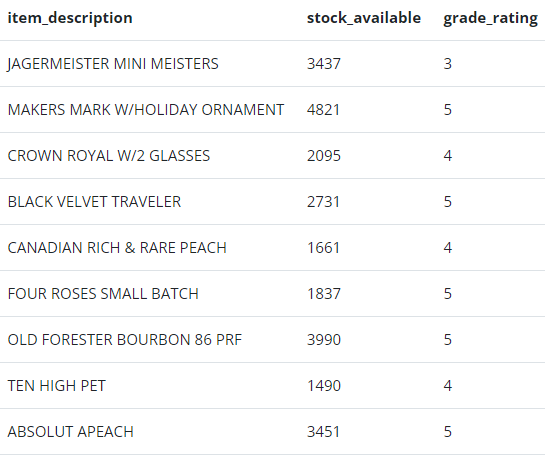

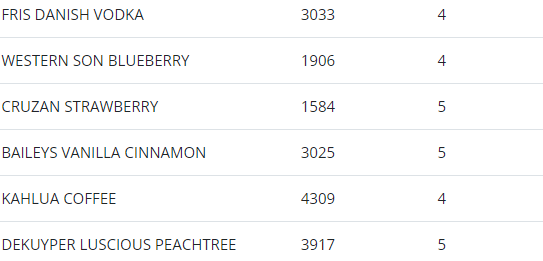

In [24]:
import sqlite3
import pandas as pd

In [25]:
# Membuat database connection
connection1=sqlite3.connect("iowa_sales.db")



# 2. Membuang tabel yang tidak diperlukan




Melihat tabel yang ada pada database iowa_sales.db

In [26]:
cursor = connection1.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('employee',)]


Karena table employee tidak diperlukan, kita hapus saja table employee.

In [27]:
cursor.execute("DROP TABLE employee")

# 3. Membuat tabel baru

Membuat table baru bernama stock

In [28]:
cursor.execute('''
CREATE TABLE stock (
  item_description VARCHAR(60) NOT NULL,
  stock_available INT NOT NULL,
  grade_rating FLOAT NOT NULL
)
''')

In [29]:
# Mengecek apakah tabel sudah terbuat/terisi
pd.read_sql_query("SELECT * from stock", connection1)

,item_description,stock_available,grade_rating


Memasukkan data secara manual ke tabel baru

In [30]:
data = [
    ('JAGERMEISTER MINI MEISTER', 3437, 3),
    ('MAKERS MARK W/HOLIDAY ORNAMENT', 4821, 5),
    ('CROWN ROYAL W/2 GLASSES', 2095, 4),
    ('BLACK VELVET TRAVELER', 2731, 5),
    ('CANADIAN RICH & RARE PEACH', 1661, 4),
    ('FOUR ROSES SMALL BATCH', 1837, 5),
    ('OLD FORESTER BOURBON 86 PRF', 3990, 5),
    ('TEN HIGH PET', 1490, 4),
    ('ABSOLUT APEACH', 3451, 5),
    ('FRIS DANISH VODKA', 3033, 4),
    ('WESTERN SON BLUEBERRY', 1906, 4),
    ('CRUZAN STRAWBERRY', 1548, 5),
    ('BAILEYS VANILLA CINNAMON', 3025, 5),
    ('KAHLUA COFFEE', 4309, 4),
    ('DEKUYPER LUSCIOUS PEACHTREE', 3971, 5)
]

cursor.executemany('INSERT INTO stock (item_description, stock_available, grade_rating) VALUES (?, ?, ?)', data)

In [31]:
# Menampilkan tabel stock
query1 ="""SELECT * from stock;"""
pd.read_sql_query(query1, connection1)

,item_description,stock_available,grade_rating
0,JAGERMEISTER MINI MEISTER,3437,3.0
1,MAKERS MARK W/HOLIDAY ORNAMENT,4821,5.0
2,CROWN ROYAL W/2 GLASSES,2095,4.0
3,BLACK VELVET TRAVELER,2731,5.0
4,CANADIAN RICH & RARE PEACH,1661,4.0
5,FOUR ROSES SMALL BATCH,1837,5.0
6,OLD FORESTER BOURBON 86 PRF,3990,5.0
7,TEN HIGH PET,1490,4.0
8,ABSOLUT APEACH,3451,5.0
9,FRIS DANISH VODKA,3033,4.0


# 4. Membuat Tabel dengan nama sales

4. Setelah Anda membuat tabel dengan nama “stock”, Anda diminta untuk membuat 1 tabel lagi dengan nama “sales” dari file Excel berikut ini : LINK

5. Selanjutnya, tambahkan kolom “rating” pada table “sales” dengan tipe data FLOAT

6. Lakukanlah beberapa pembaharuan dengan ketentuan sebagai berikut :

Data pada variabel pack yang memiliki category_name CREAM LIQUEURS diubah menjadi 40
Data pada variabel sale_dollars yang memiliki  item_descriptions TITOS HANDMADE VODKA diubah menjadi 400
Data pada variabel item _description yang memiliki category_name AMERICAN VODKAS menjadi MCCORMICK 80PRF VODKA
Entry data yang memiliki nilai bottles_sold kurang dari 20 dihapus
Entry data yang memiliki nilai sale_dollars kurang dari 100 dan lebih dari 1000 dihapus

In [37]:

# Baca file Excel
sales_data = pd.read_excel('Iowa_sales1.xlsx')



In [38]:
# Membuat koneksi ke database SQlite
conn = sqlite3.connect('iowa_sales1.db')

In [39]:
# Menyimpan Dataframe sebagai tabel sales
sales_data.to_sql('sales', conn, if_exists='replace', index=False)

1000

In [40]:
# Membuat variabel cursor ke koneksi
cursor = conn.cursor()

In [41]:
# Menuliskan query yang akan dijalankan
query = """SELECT name FROM sqlite_master WHERE type='table';"""

In [42]:
# Menampilkan hasil
cursor.execute(query)
print(cursor.fetchall())

[('sales',)]


In [43]:
# Menampilkan data dari tabel sales
pd.read_sql_query("SELECT * from sales", conn)

,store_number,store_name,city,county_number,county,category_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars
0,5052,CASEY'S GENERAL STORE #3220 / GREENF,GREENFIELD,1,ADAIR,SPICED RUM,43025,ADMIRAL NELSON SPICED RUM PET,12,750,6.00,9.00,24,216.00
1,4317,FAREWAY STORES #941 / GREENFIELD,GREENFIELD,1,ADAIR,CANADIAN WHISKIES,10550,BLACK VELVET TOASTED CARAMEL,12,750,6.75,10.13,24,243.12
2,5052,CASEY'S GENERAL STORE #3220 / GREENF,GREENFIELD,1,ADAIR,CANADIAN WHISKIES,11786,BLACK VELVET TRAVELER,12,750,5.23,7.85,24,188.40
3,4472,QUICK SHOP FOODS / CENTERVILLE,CENTERVILLE,4,APPANOOSE,CANADIAN WHISKIES,11776,BLACK VELVET,12,750,5.23,7.85,24,188.40
4,4419,KUM & GO #4 / LAMONI,LAMONI,27,DECATUR,IMPORTED CORDIALS & LIQUEURS,65259,JAGERMEISTER MINI MEISTERS,12,20,4.93,7.40,1,7.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3722,WAL-MART 1361 / SIOUX CITY,SIOUX CITY,97,WOODBURY,AMERICAN VODKAS,78293,SMIRNOFF PEACH LEMONADE,12,750,8.25,12.38,24,297.12
996,4197,FAREWAY STORES #014 / SERGEANT BLUFF,SERGEANT BLUFF,97,WOODBURY,AMERICAN VODKAS,38176,TITOS HANDMADE VODKA,12,750,10.00,15.00,24,360.00
997,2621,HY-VEE FOOD STORE #3 / SIOUX CITY,SIOUX CITY,97,WOODBURY,AMERICAN VODKAS,38176,TITOS HANDMADE VODKA,12,750,10.00,15.00,24,360.00
998,5388,KUM & GO #119/ NORTHWOOD,NORTHWOOD,98,WORTH,STRAIGHT BOURBON WHISKIES,17086,BULLEIT BOURBON,12,750,16.50,24.75,24,594.00


# 5. Menambahkan kolom rating dengan tipe data float


In [46]:
# Buat tabel sales dengan kolom rating
query="""ALTER TABLE sales ADD COLUMN rating FLOAT;"""

conn.execute(query)
conn.commit()

In [47]:
# Menampilkan tabel sales
pd.read_sql_query("SELECT * from sales", conn)

,store_number,store_name,city,county_number,county,category_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,rating
0,5052,CASEY'S GENERAL STORE #3220 / GREENF,GREENFIELD,1,ADAIR,SPICED RUM,43025,ADMIRAL NELSON SPICED RUM PET,12,750,6.00,9.00,24,216.00,None
1,4317,FAREWAY STORES #941 / GREENFIELD,GREENFIELD,1,ADAIR,CANADIAN WHISKIES,10550,BLACK VELVET TOASTED CARAMEL,12,750,6.75,10.13,24,243.12,None
2,5052,CASEY'S GENERAL STORE #3220 / GREENF,GREENFIELD,1,ADAIR,CANADIAN WHISKIES,11786,BLACK VELVET TRAVELER,12,750,5.23,7.85,24,188.40,None
3,4472,QUICK SHOP FOODS / CENTERVILLE,CENTERVILLE,4,APPANOOSE,CANADIAN WHISKIES,11776,BLACK VELVET,12,750,5.23,7.85,24,188.40,None
4,4419,KUM & GO #4 / LAMONI,LAMONI,27,DECATUR,IMPORTED CORDIALS & LIQUEURS,65259,JAGERMEISTER MINI MEISTERS,12,20,4.93,7.40,1,7.40,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3722,WAL-MART 1361 / SIOUX CITY,SIOUX CITY,97,WOODBURY,AMERICAN VODKAS,78293,SMIRNOFF PEACH LEMONADE,12,750,8.25,12.38,24,297.12,None
996,4197,FAREWAY STORES #014 / SERGEANT BLUFF,SERGEANT BLUFF,97,WOODBURY,AMERICAN VODKAS,38176,TITOS HANDMADE VODKA,12,750,10.00,15.00,24,360.00,None
997,2621,HY-VEE FOOD STORE #3 / SIOUX CITY,SIOUX CITY,97,WOODBURY,AMERICAN VODKAS,38176,TITOS HANDMADE VODKA,12,750,10.00,15.00,24,360.00,None
998,5388,KUM & GO #119/ NORTHWOOD,NORTHWOOD,98,WORTH,STRAIGHT BOURBON WHISKIES,17086,BULLEIT BOURBON,12,750,16.50,24.75,24,594.00,None


# 6.1 Data pada variabel pack yang memiliki category_name CREAM LIQUEURS diubah menjadi 40

In [48]:
query = """UPDATE sales SET pack = 40 WHERE category_name = 'CREAM LIQUEURS';"""

conn.execute(query)
conn.commit()

In [49]:
# Menampilkan hasil dari data yang terdapat category name Cream liquers yang telah diubah
pd.read_sql_query("SELECT * from sales WHERE category_name = 'CREAM LIQUEURS'", conn)


,store_number,store_name,city,county_number,county,category_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,rating
0,2515,HY-VEE FOOD STORE #1 / MASON CITY,MASON CITY,17,CERRO GORDO,CREAM LIQUEURS,68049,BAILEYS VANILLA CINNAMON,40,750,13.00,19.50,24,468.00,None
1,4204,FAREWAY STORES #025 / CLINTON,CLINTON,23,CLINTON,CREAM LIQUEURS,73055,RUMCHATA,40,750,12.50,18.75,24,450.00,None
2,2558,HY-VEE FOOD STORE / MOUNT PLEASANT,MOUNT PLEASANT,44,HENRY,CREAM LIQUEURS,68022,BAILEYS SALTED CARAMEL,40,750,13.50,20.25,24,486.00,None
3,2584,HY-VEE FOOD STORE / FORT MADISON,FORT MADISON,56,LEE,CREAM LIQUEURS,68011,BAILEYS STRAWBERRIES & CREAM,40,750,13.00,19.50,24,468.00,None
4,3549,QUICKER LIQUOR STORE,FORT MADISON,56,LEE,CREAM LIQUEURS,73055,RUMCHATA,40,750,13.00,19.50,24,468.00,None
5,2590,HY-VEE FOOD STORE #5 / CEDAR RAPIDS,CEDAR RAPIDS,57,LINN,CREAM LIQUEURS,68036,BAILEYS ORIGINAL IRISH CREAM,40,750,16.49,24.74,24,593.76,None
6,2569,HY-VEE FOOD STORE #2 / CEDAR RAPIDS,CEDAR RAPIDS,57,LINN,CREAM LIQUEURS,68036,BAILEYS ORIGINAL IRISH CREAM,40,750,16.49,24.74,24,593.76,None
7,2566,HY-VEE FOOD STORE / KNOXVILLE,KNOXVILLE,63,MARION,CREAM LIQUEURS,73055,RUMCHATA,40,750,13.50,20.25,24,486.00,None
8,5127,PRICE CHOPPER / INGERSOLL,DES MOINES,77,POLK,CREAM LIQUEURS,67902,BAILEYS DELICIOUSLY LIGHT,40,750,16.49,24.74,24,593.76,None
9,4829,CENTRAL CITY 2,DES MOINES,77,POLK,CREAM LIQUEURS,73055,RUMCHATA,40,750,13.00,19.50,24,450.00,None


# 6.2 Data pada variabel sale_dollars yang memiliki  item_descriptions TITOS HANDMADE VODKA diubah menjadi 400

In [50]:
query = """UPDATE sales SET sale_dollars = 400 WHERE item_description LIKE '%TITOS HANDMADE VODKA%';"""

conn.execute(query)
conn.commit()

In [51]:
# Menampilkan baris data yang memiliki item deskripsi 'TITOS HANDMADE VODKA' yang sale_dollars nya telah diubah menjadi 400
pd.read_sql_query("SELECT * from sales WHERE item_description = 'TITOS HANDMADE VODKA'", conn)

,store_number,store_name,city,county_number,county,category_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,rating
0,4147,FAREWAY STORES #974 / CEDAR FALLS,CEDAR FALLS,7,BLACK HAWK,AMERICAN VODKAS,38176,TITOS HANDMADE VODKA,12,750,10.00,15.00,24,400.0,None
1,4988,HAPPY'S WINE & SPIRITS,CEDAR FALLS,7,BLACK HAWK,AMERICAN VODKAS,38176,TITOS HANDMADE VODKA,12,750,10.00,15.00,24,400.0,None
2,3889,WAL-MART 1005 / WAVERLY,WAVERLY,9,BREMER,AMERICAN VODKAS,38176,TITOS HANDMADE VODKA,12,750,10.00,15.00,24,400.0,None
3,3859,WAL-MART 0750 / INDEPENDENCE,INDEPENDENCE,10,BUCHANAN,AMERICAN VODKAS,38176,TITOS HANDMADE VODKA,12,750,9.64,14.46,24,400.0,None
4,3833,WAL-MART 3394 / ATLANTIC,ATLANTIC,15,CASS,AMERICAN VODKAS,38176,TITOS HANDMADE VODKA,12,750,9.64,14.46,24,400.0,None
5,3528,SUPER TARGET T-0804 MASON CITY,MASON CITY,17,CERRO GORDO,AMERICAN VODKAS,38176,TITOS HANDMADE VODKA,12,750,10.00,15.00,24,400.0,None
6,3528,SUPER TARGET T-0804 MASON CITY,MASON CITY,17,CERRO GORDO,AMERICAN VODKAS,38176,TITOS HANDMADE VODKA,12,750,10.00,15.00,24,400.0,None
7,5617,CASEY'S GENERAL STORE #2513 / NASHUA,NASHUA,19,CHICKASAW,AMERICAN VODKAS,38176,TITOS HANDMADE VODKA,12,750,10.00,15.00,24,400.0,None
8,2616,HY-VEE FOOD AND DRUG / CLINTON,CLINTON,23,CLINTON,AMERICAN VODKAS,38176,TITOS HANDMADE VODKA,12,750,10.00,15.00,24,400.0,None
9,2616,HY-VEE FOOD AND DRUG / CLINTON,CLINTON,23,CLINTON,AMERICAN VODKAS,38176,TITOS HANDMADE VODKA,12,750,9.64,14.46,24,400.0,None


# 6.3 Data pada variabel item _description yang memiliki category_name AMERICAN VODKAS menjadi MCCORMICK 80PRF VODKA

In [52]:
query = """UPDATE sales SET item_description = 'MCCORMICK 80PRF VODKA' WHERE category_name = 'AMERICAN VODKAS';"""

conn.execute(query)
conn.commit()

In [53]:
# Menampilkan hasil yang telah diubah
pd.read_sql_query("SELECT * from sales WHERE category_name = 'AMERICAN VODKAS'", conn)

,store_number,store_name,city,county_number,county,category_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,rating
0,5714,YESWAY #1031,CENTERVILLE,4,APPANOOSE,AMERICAN VODKAS,36304,MCCORMICK 80PRF VODKA,24,375,1.86,2.79,48,133.92,None
1,5426,PRIME MART 2 / CEDAR FALLS,CEDAR FALLS,7,BLACK HAWK,AMERICAN VODKAS,35926,MCCORMICK 80PRF VODKA,12,750,3.37,5.06,24,121.44,None
2,4959,BANI'S,CEDAR FALLS,7,BLACK HAWK,AMERICAN VODKAS,35916,MCCORMICK 80PRF VODKA,12,750,3.37,5.06,24,121.44,None
3,5295,YESWAY STORE # 10023/ WATERLOO,WATERLOO,7,BLACK HAWK,AMERICAN VODKAS,36305,MCCORMICK 80PRF VODKA,12,750,3.34,5.01,24,120.24,None
4,5941,PRIME MART - CEDAR FALLS,CEDAR FALLS,7,BLACK HAWK,AMERICAN VODKAS,36305,MCCORMICK 80PRF VODKA,12,750,3.34,5.01,24,120.24,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,3722,WAL-MART 1361 / SIOUX CITY,SIOUX CITY,97,WOODBURY,AMERICAN VODKAS,37996,MCCORMICK 80PRF VODKA,12,750,8.25,12.38,24,297.12,None
281,3722,WAL-MART 1361 / SIOUX CITY,SIOUX CITY,97,WOODBURY,AMERICAN VODKAS,78293,MCCORMICK 80PRF VODKA,12,750,8.25,12.38,24,297.12,None
282,4197,FAREWAY STORES #014 / SERGEANT BLUFF,SERGEANT BLUFF,97,WOODBURY,AMERICAN VODKAS,38176,MCCORMICK 80PRF VODKA,12,750,10.00,15.00,24,400.00,None
283,2621,HY-VEE FOOD STORE #3 / SIOUX CITY,SIOUX CITY,97,WOODBURY,AMERICAN VODKAS,38176,MCCORMICK 80PRF VODKA,12,750,10.00,15.00,24,400.00,None


# 6.4 Entry data yang memiliki nilai bottles_sold kurang dari 20 dihapus

In [54]:
query ="""DELETE FROM sales WHERE bottles_sold < 20;"""

conn.execute(query)
conn.commit()

In [55]:
# Menampilkan data yang nilai bottles_sold < 20 sudah di hapus
pd.read_sql_query("SELECT * from sales WHERE bottles_sold < 20", conn)

,store_number,store_name,city,county_number,county,category_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,rating


# 6.5 Entry data yang memiliki nilai sale_dollars kurang dari 100 dan lebih dari 1000 dihapus

In [56]:
query = """DELETE FROM sales WHERE sale_dollars < 100 OR sale_dollars > 1000;"""

conn.execute(query)
conn.commit

<function Connection.commit()>

In [57]:
# Menampilkan data yang telah dihapus
pd.read_sql_query("SELECT * from sales WHERE sale_dollars < 100 OR sale_dollars > 1000", conn)


,store_number,store_name,city,county_number,county,category_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,rating
